<a href="https://colab.research.google.com/github/Archi911/iris_classification/blob/main/IrisFlower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Iris Flower Classification**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load The Dataset

In [8]:
dataset=pd.read_csv("Dataset.csv")

In [ ]:
#printing first 5 rows
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Deleting column that is not required
dataset = dataset.drop(columns = ["Id"])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
# Checking for null values
dataset.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


Analyzing the Data

In [12]:
# getting statistical values from the dataset
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# get the number of rows and columns
dataset.shape

(150, 5)

Data Visualization

<Axes: >

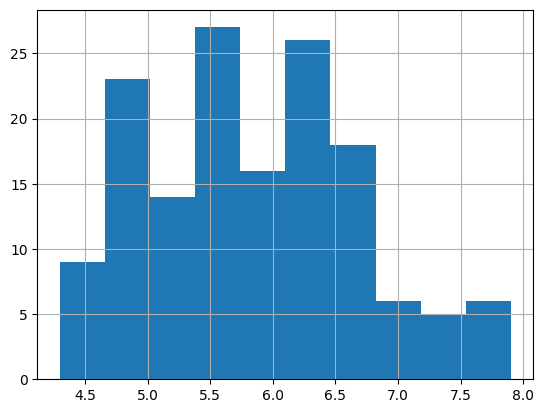

In [14]:
# Histograms
dataset['SepalLengthCm'].hist()

<Axes: >

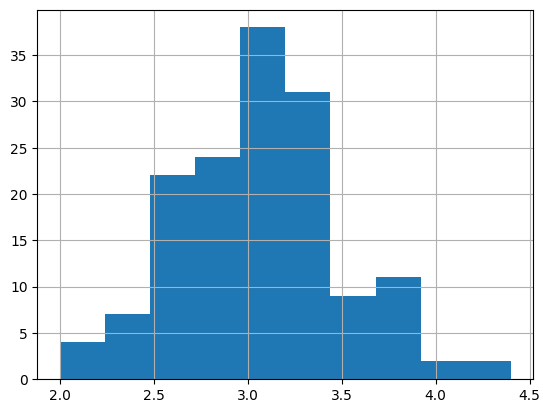

In [15]:
dataset['SepalWidthCm'].hist()

<Axes: >

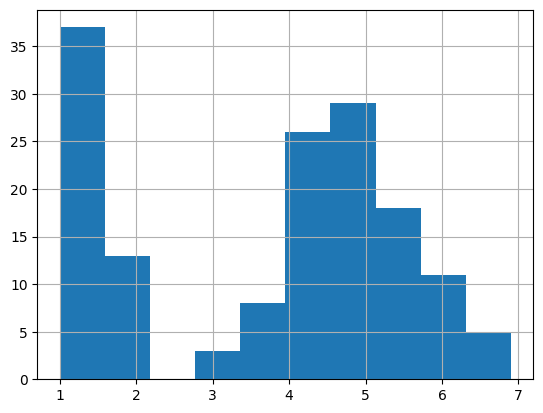

In [16]:
dataset['PetalLengthCm'].hist()

<Axes: >

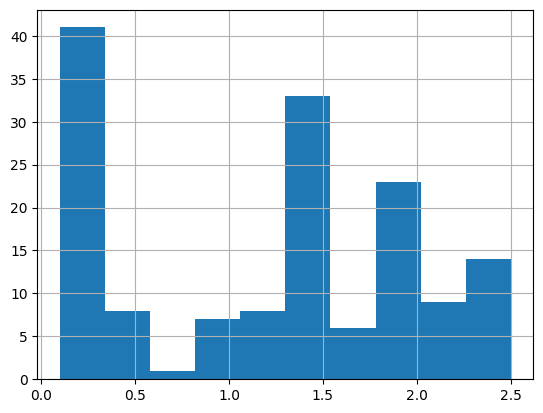

In [17]:
dataset['PetalWidthCm'].hist()

In [18]:
# Creating a Scatterplot
colors = ['blue', 'orange', 'red']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

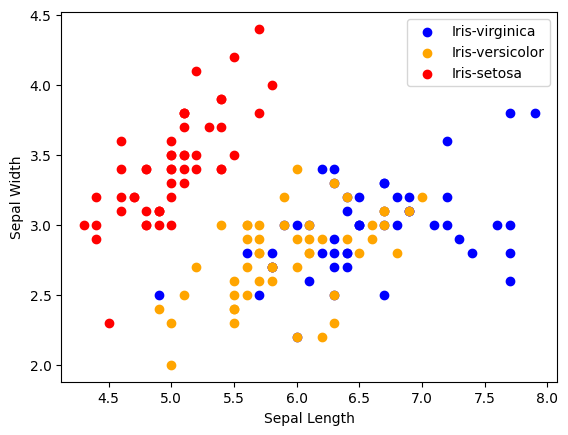

In [19]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

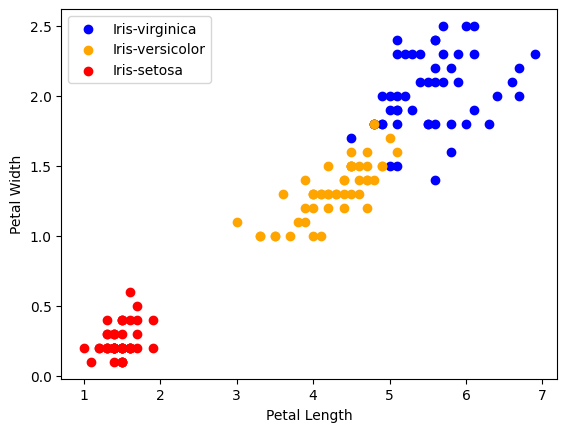

In [20]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

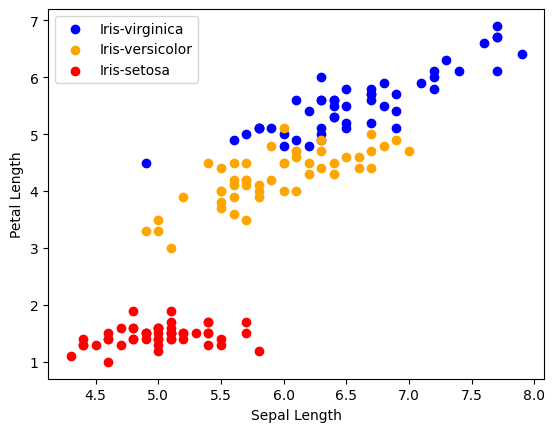

In [21]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

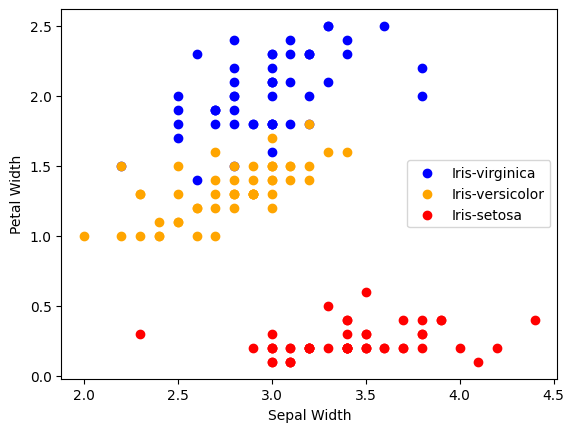

In [22]:
for i in range(3):
    x = dataset[dataset['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Finding the Correlation

In [23]:
# finding correlation
corr = dataset.corr(numeric_only = "True")

In [24]:
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

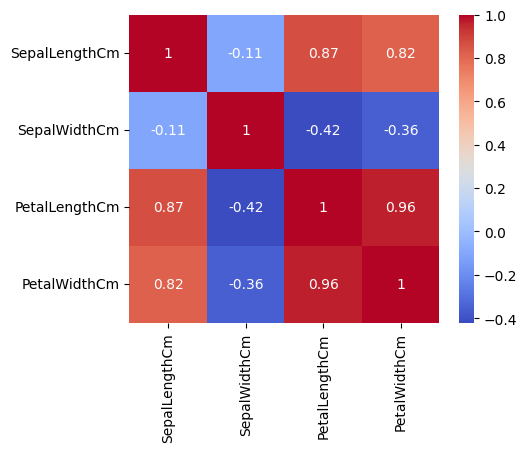

In [25]:
# constructing a heatmap
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [26]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
dataset['Species'] = le.fit_transform(dataset['Species'])

Separating Features and Target

In [28]:
X = dataset.drop(columns=['Species'])
Y = dataset['Species']

In [29]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [30]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


Separating Training and Testing Data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# data is split in ratio of 70:30 for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Training the Model

In [33]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [34]:
model.fit(X_train, Y_train)

LogisticRegression()

In [35]:
# accuracy
print("Accuracy: ",model.score(X_test,Y_test) * 100)

Accuracy:  97.77777777777777


In [36]:
# using knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [37]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

KNeighborsClassifier()

In [38]:
# accuracy through knn
print("Accuracy: ",model.score(X_test,Y_test) * 100)

Accuracy:  97.77777777777777


In [39]:
# using decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [40]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

Decision_tree()

In [41]:
# accuracy through descision tree
print("Accuracy: ",model.score(X_test,Y_test) * 100)

Accuracy:  91.11111111111111
